<a href="https://colab.research.google.com/github/PrasadKhadatkar/Prasad-Khadatkar/blob/main/Prasad_UPDATED_World_Bank_Global_Education_Analysis_(23_09_2022)_it_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

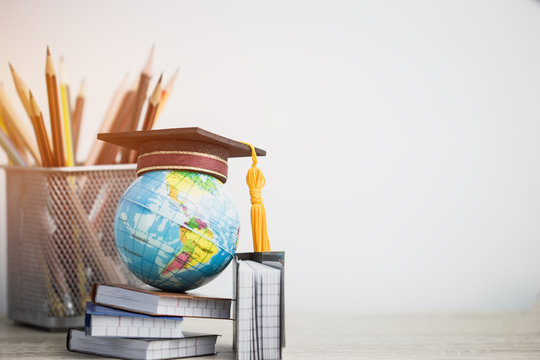

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>


**In this project we are going to analyze the World Bank EdStats Data in order to find out valuable insights.**

#**The following Indicators have been chosen for analysis:-**

##Economy:-

GDP at market prices (current US$)	NY.GDP.MKTP.CD

GDP per capita (current US$)	NY.GDP.PCAP.CD

##Early Childhood Education:-

Out-of-school children of primary school age, both sexes (number)	SE.PRM.UNER

Enrolment in pre-primary education, female (number)	SE.PRE.ENRL.FE

Enrolment in secondary education, female (number)	SE.SEC.ENRL.FE

Enrolment in tertiary education, all programmes, female (number)	SE.TER.ENRL.FE

Pupil-teacher ratio in primary education (headcount basis)	SE.PRM.ENRL.TC.ZS

##Expenditures:-

Government expenditure on education as % of GDP (%) - SE.XPD.TOTL.GD.ZS

Expenditure on education as % of total government expenditure (%) SE.XPD.TOTL.GB.ZS

##Literacy among working population:-

Labor force, total	SL.TLF.TOTL.IN

Population:-

Population growth (annual %)  SP.POP.GROW

##Learning Outcomes:-

PISA: Mean performance on the Reading scale (number) - LO.PISA.REA

PISA: Mean performance on the Mathematics scale (number) - LO.PISA.MAT

#Importing Necessary Modules and Libraries

We are importing following libraries for their respective applications:

Pandas:- Pandas is used to analyze data. It has functions for analyzing, cleaning, exploring, and manipulating data.

Matplotlib:- Matplotlib is a graph plotting library in python that serves as a visualization utility. Most of the Matplotlib utilities lies under the pyplot submodule.

In [ ]:
# Importing packages like Pandas,Numpy, Matplotlib, Seaborn & plotly.graph_objects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from google.colab import drive

In [ ]:
# Mounting drive to import files from google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('max_columns', None, 'max_rows', None, 'display.max_columns', None, 'display.max_rows',None)

#**Loading and Discovering Data**


---


Now, we need to load our data from the external source, which in this case is uploaded to the drive. Also we would try to spot the nature and properties of the data that we have. The data is divided into 5 different CSV files, each containing the information as follows:

**1.EdStatsData**:- This file contains Education Statistics data (from ear 1970 to 2100) of all the countries that are World Bank members and this data is dependent on various indicators that resembles various factors that affect the overall Education growth and development of the country. These indicators can be access, availabilty, teachers, expenditures, population, lieracy, assessments etc.

**2.EdStatsCountry**:- This file contains information from census and surveys across various departments, segregated in a country-wise manner

**3.EdStatsCountry-Series**:- This file contains the Series Code for various indicators, as well as the Data sources from which they have been derived

**4.EdStatsFootNote**:- This file contains year wise indicator names along with their respective descrption. It tells us the nature of the indicators, if its and estimate value or a percentage distribution etc. From context of our analysis this information isn't quite useful, since its already evident with the type of data EdStatsData holds.

**5.EdStatsSeries**:- This file contains regional learning assessments data(e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data.

In [ ]:
# Loading all the csv files.
path1=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsCountry-Series.csv')
path2=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsCountry.csv')
path3=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsData.csv')
path4=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsFootNote.csv')
path5=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsSeries.csv')


In [ ]:
# Reading the csv files and making df from it
Ed_stats_data_df = pd.read_csv(path1)
country_df=pd.read_csv(path2)
main_data=pd.read_csv(path3)
new_data=pd.read_csv(path3)
Ed_stats_footnote_df = pd.read_csv(path4)
Ed_stats_series_df = pd.read_csv(path5) 

###***Getting overview of data***

In [ ]:
# Shape of main data
main_data.shape

(886930, 70)

In [ ]:
# Displaying the first few rows of main Data.
main_data.head(7)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Displaying the info of main data
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [ ]:
main_data.isnull().sum()/len(main_data)*100

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64

In [ ]:
# Using the describe function to analyze the nature and paradigm of main data.
main_data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [ ]:
# Using to column attribute to see what type of information is stored in  main data.
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [ ]:
# After reading the data we 1st droped all the columns that had null data. 
# Dropped null value  columns
main_data.drop(['2016','2017','2020','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1,inplace=True)


In [ ]:
# Dropping of the 'Country Code' from main data. 
main_data.drop(['Country Code'],axis=1,inplace=True)

###***Creating dataframes for EDA which will be used in this notebook for analysis.***

In [ ]:
# Making "Country Name" column index so that we can apply .loc in order to make dataframe on the basis of region and income group.
main_data.set_index(['Country Name'],inplace=True)

In [ ]:
# Making df for specific income group.
Income_df=main_data.loc[['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income']]

In [ ]:
# Making df for specific region.
Region_df=main_data.loc[['World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)']]

###***GDP analysis of World for the year 2015***








Q1. Show GDP of world on map.

In [ ]:
# Creating data frame using path3 and cleaning the data
exp1_2=pd.read_csv(path3)

# Indicator Code for world GDP is NY.GDP.MKTP.CD
exp1_2.set_index('Indicator Code',inplace=True)
exp2_2=exp1_2.loc[['NY.GDP.MKTP.CD'],['Country Name','Country Code','2015']]

# Droping region wise data in order to get only data for countries and droping null values as well.
exp2_2.set_index('Country Name',inplace=True)
exp3_2=exp2_2.drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
exp3_2.reset_index('Country Name',inplace=True)


In [ ]:
# Using plotly.graph_objects to plot the values of GDP of each country on world map to make a chloropleth.

# Giving country code to plotly so it can read code and match it with the inbuilt graph and further data to add in the chloropleth. 
fig = go.Figure(data=go.Choropleth(
    locations = exp3_2['Country Code'],
    z = exp3_2["2015"],
    text = exp3_2['Country Name'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP',
))

# Making the layout of the map and giving annotations.
fig.update_layout(
    title_text='GDP of Countries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text = '',
        showarrow = False
    )]
)

fig.show()

#**Observations :-**


---


GDP at market price of all the countries in the world in year 2015 have been ploted on the map, with color coding.

Which gives an overview about the economic condition of the world in year 2015.




**Q2**. Calculate the mean GDP of world and mean per capita GDP of world and show Countries above mean GDP of world and mean per capita of world?










In [ ]:
# Mean GDP
# Creating data set by droping unwanted data on indicator code NY.GDP.MKTP.CD

graph_3a=main_data.loc[main_data['Indicator Code']=='NY.GDP.MKTP.CD','2015'].drop(['Heavily indebted poor countries (HIPC)', 
                                                                                   'High income','Least developed countries: UN classification', 
                                                                                   'Low & middle income', 'Low income', 
                                                                                   'Lower middle income','Middle income','World','Arab World',
                                                                                   'East Asia & Pacific','East Asia & Pacific (excluding high income)',
                                                                                   'Europe & Central Asia','Europe & Central Asia (excluding high income)',
                                                                                   'European Union','Euro area','Latin America & Caribbean',
                                                                                   'Latin America & Caribbean (excluding high income)',
                                                                                   'Middle East & North Africa','Middle East & North Africa (excluding high income)',
                                                                                   'North America','OECD members','Least developed countries: UN classification',
                                                                                   'South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)',
                                                                                   'Upper middle income'],axis=0).dropna()

# Creating dataframe for the countries having GDP above mean GDP.

df = graph_3a.to_frame(name="2015")
country_above_mean_gdp=df[df['2015']>np.mean(df['2015'])]
Mean_GDP = np.mean(df['2015'])
print(f'{Mean_GDP}is the Mean GDP of world.')



374979491861.97833is the Mean GDP of world.


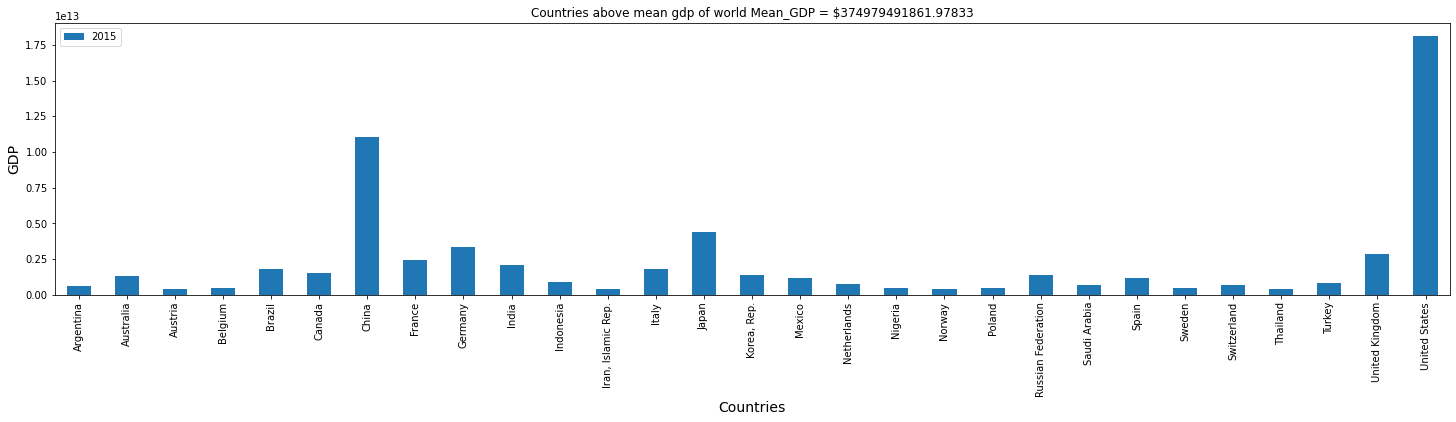

In [ ]:
# Ploting graph for the countries above mean GDP.

plt.rcParams['figure.figsize']=(25,5)
country_above_mean_gdp.plot(kind='bar')

plt.title(f'Countries above mean gdp of world Mean_GDP = ${Mean_GDP}')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('GDP',fontsize=14)
plt.show()

#Observation:-


---


1. The above bar chart shows GDP of the countries with GDP above mean GDP of the world(374 BIllion USD approx).

2. Here we have represented the countries from the Groups like G7, G20 which are amongst the biggeset economies of the world.

Mean per capita

In [ ]:
# Mean per capita GDP
# Creating data set by droping unwanted data on indicator code NY.GDP.PCAP.CD

graph_3b=main_data.loc[main_data['Indicator Code']=='NY.GDP.PCAP.CD','2015'].drop(['Heavily indebted poor countries (HIPC)', 'High income',
                                                                                   'Least developed countries: UN classification', 'Low & middle income', 
                                                                                   'Low income', 'Lower middle income','Middle income','World','Arab World',
                                                                                   'East Asia & Pacific','East Asia & Pacific (excluding high income)',
                                                                                   'Europe & Central Asia','Europe & Central Asia (excluding high income)',
                                                                                   'European Union','Euro area','Latin America & Caribbean',
                                                                                   'Latin America & Caribbean (excluding high income)','Middle East & North Africa',
                                                                                   'Middle East & North Africa (excluding high income)','North America',
                                                                                   'OECD members','Least developed countries: UN classification','South Asia',
                                                                                   'Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)',
                                                                                   'Upper middle income'],axis=0).dropna()



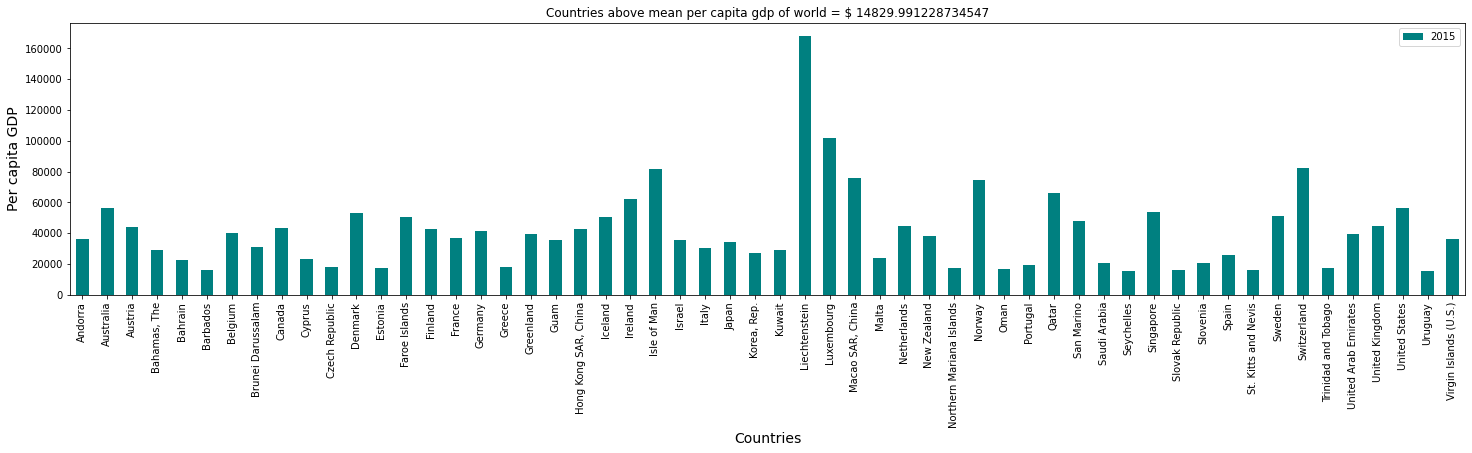

In [ ]:
# Ploting graph for the countries above mean GDP.

df_1 = graph_3b.to_frame(name="2015")
country_above_mean_pcgdp=df_1[df_1['2015']>np.mean(df_1['2015'])]
mean_percapita_gdp=np.mean(df_1['2015'])
plt.rcParams['figure.figsize']=(25,5)
country_above_mean_pcgdp.plot(kind='bar',color='Teal')
plt.title(f'Countries above mean per capita gdp of world = $ {mean_percapita_gdp}')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Per capita GDP',fontsize=14)
plt.show()

#Observation:-


---


Here we have shown the countries with per capita income more than mean per capita of the world(14800 USD approx.)

THe length of the bar represents the per capiita of each country.

We can clearly Liechtenstein have the highest per capita income in the world (160k USD approx.)

Q3. Calculate the no. of countries which belongs to different income group?   ,eg:
*   High income
*   low income



In [ ]:
# Using Data from path 2 and creating df.
Countries_incomegroup=country_df[['Income Group','Short Name']].groupby(country_df[['Income Group','Short Name']]['Income Group']).agg({'Short Name':'count'})
Countries_incomegroup.rename(columns = {'Income Group':'new_col1', 'Short Name':'new_col2'}, inplace = True)
Countries_incomegroup


,new_col2
Income Group,
High income: OECD,31
High income: nonOECD,44
Low income,34
Lower middle income,50
Upper middle income,55


Observation:-

We can clearly see that most countries fall in the middle income group , 105 to be precise.

There are about 75 countries which fall in the high income group , most of these countries are from Europe and north america.

Q4. Calculate the persentage of different income group in the world?

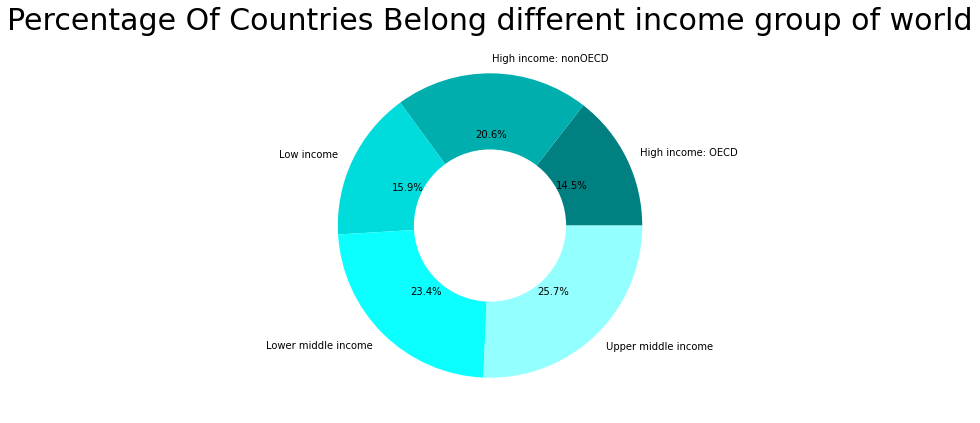

In [ ]:
# Got the data from above outcome

Income = ['High income: OECD','High income: nonOECD','Low income','Lower middle income','Upper middle income']
data = [31,44,34,50,55]

# Creating Doughnut chart for presenting the percentage of differnet income group.

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Income,autopct='%0.1f%%',radius=1, colors = ['#008080','#00AEAE', '#00DCDC','#0BFFFF','#94FFFF'])
plt.pie([100],colors=['w'],radius=0.5)

plt.title('Percentage Of Countries Belong different income group of world',color='Black', fontsize = 30)
 
# show plot
plt.show()

#Obserevation :-


---


Here we can see,

35.1% of the countries are in high income group.

Roughly 1/4th of the world countries are in middle income countries.

More then 1/3rd of the countries are low income countries.


Q5. Show different income groups on the world map?

In [ ]:
# creating a df from path 2
df_country = pd.read_csv(path2)

In [ ]:
# Appending values according to the string in a list.

allocation = []

for i in df_country['Income Group']:
  if i == "High income: nonOECD" or i == "High income: OECD":
    allocation.append(4)
  elif i == 'Upper middle income':
    allocation.append(3)
  elif i == 'Lower middle income':
    allocation.append(2)
  elif i == 'Low income':
    allocation.append(1)
  else:
    allocation.append(0)
df_country["allocation"] = allocation

# Using the plotly.graph_objects to plot the values of income groups over the world map to make a chloropleth.
# Giving country code to plotly so it can read code and match it with the inbuilt graph and further data to add in the chloropleth. 

fig = go.Figure(data=go.Choropleth(
    locations = df_country['Country Code'],
    z = df_country["allocation"],
    text = df_country['Short Name'],
    colorscale = 'teal',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Economy<br>Class ',
))

# Making the layout of the map and giving annotations.
fig.update_layout(
    title_text='World Economy Class',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text = 'Low Income = 1, Lower Middle Income = 2, Upper Middle Income = 3, High income = 4 ',
        showarrow = False
    )]
)

fig.show()

#Observation :-


---


Here wee can see all the countries in the world marked in different colour , representing the four income groups.

From the above world map its very avident that most high income countries are from europe and north america.

And most low income countries are from africa.

And the middle income countries are concentrated in middle east , east asia and south america.


Q6. Calculate percentage share of GDP with different income classes?




In [ ]:
#Creating dataframe for the indicator code NY.GDP.MKTP.CD 
GDP_Share =Income_df[Income_df['Indicator Code']=='NY.GDP.MKTP.CD']
GDP_Share.loc[['High income', 'Middle income', 'Low income', 'Lower middle income',],['2015']]
name = ['High income', 'Middle income', 'Low income', 'Lower middle income',]
quantity=[4.757751e+13,2.679605e+13,4.023901e+11,6.017050e+12]



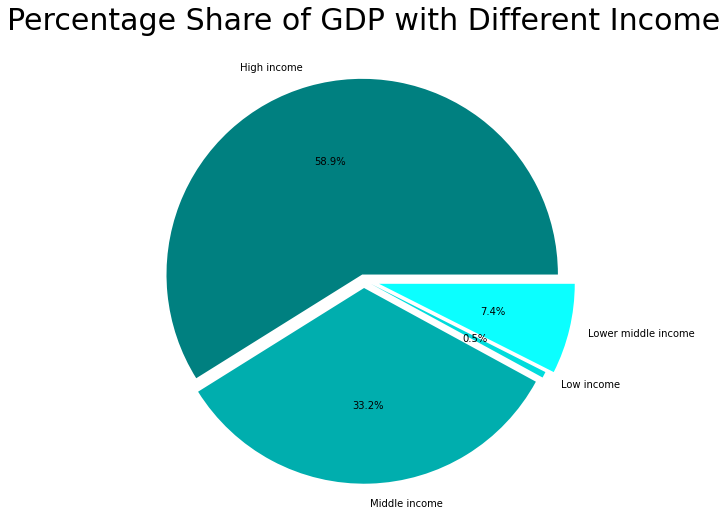

In [ ]:
#Ploting the percentage of share in pie chart
fig = plt.figure(figsize =(12,9))
plt.pie(quantity,labels=name,autopct='%0.1f%%', explode = [0.03,0.04,0.04,0.08],colors = ['#008080','#00AEAE', '#00DCDC','#0BFFFF'])
plt.title('Percentage Share of GDP with Different Income', fontsize = 30)
plt.show()

#Observation :-


---


From the above pie chart its very clear that high income countries despite being less in numbers(1/4th) controls roughly 60% of the worlds GDP.

Low income countries despite being 1/3rd in numbers controls only about 0.5% of the Global GDP. Which tells alot about the status of education in these countries.



###*Education EDA*

---



---



---



Q1 Show the trend for the enrollment at primary level over the years

In [ ]:
# Extracting data and creating df for the indicator SE.PRM.UNER
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.UNER']
graph_4a=no_primary_enrollment.transpose()
graph_4a.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4a.dropna(inplace=True)


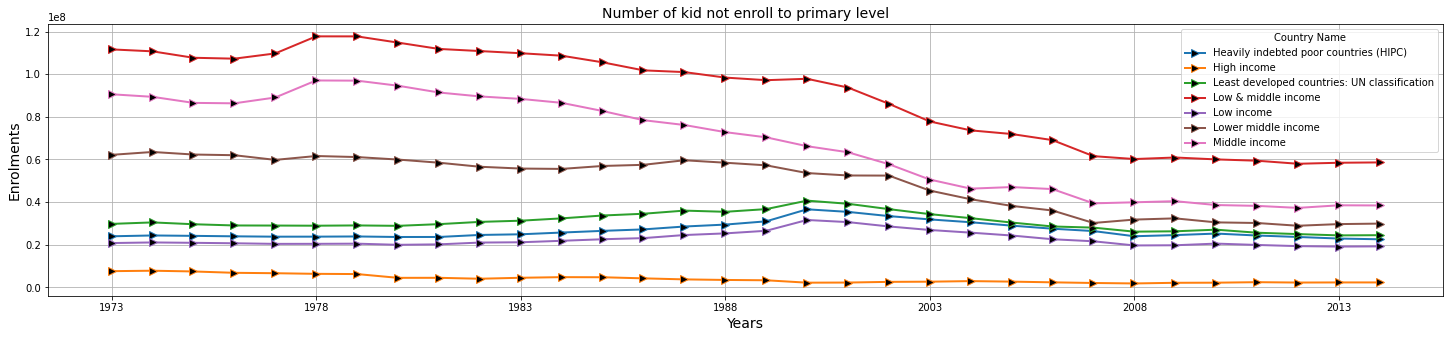

In [ ]:
#Ploting the trend for last few years
plt.rcParams['figure.figsize']=(25,5)
graph_4a.plot(linewidth=2,
    linestyle='-',
    marker='>',markerfacecolor='black',markersize=8)
plt.title('Number of kid not enroll to primary level',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolments',fontsize=14)
plt.grid(True)

plt.show()


# Above function will create and display the graph after successful execution.  
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# linewidth:- thickness of trend lines.
# linestyle :- the style of the lines.
# marker:- used to show a trend or mark an important value.  

Observation:-

From the previous graph we have alreedy known that high income countries control 60% of the Global GDP, these countries have the resources and the social conditions which supports education. Here we can see the no of children out of school has always been extremely low.

The no of kids out of school in middle income countries has been in a steady decline since 1978. which is a very good sign , as it also tells about economical stabilty and priorities of the people and the goverment. But since the 2007-2008 global slow downn in GDP the number has been in the same place which tells even though markets and GDP is back on track, the improvement in the education sectr has been on a stand still.

the number of children out of the school is in a similar range since for the low income counties, which is a sign of worry.


##***Inferrence*** :- 

1.   Overall trend is downward, which shows the improvement in the enrollment at primary level.
2.  It has been extremenly low for High income group, which shows the high income group favours good education.
3.  The trensd shows for the  lower and middle group the number of children out of school at primary level has been constantly decling over the decade but for some reason it has been stagnant for some reason.



---



---



Q2. Show the trend at all the level i.e Primary,Secondry and Tertiary for female student

In [ ]:
# first last five years i.e. 2010-2015  - columns.
# for girls enr0llment primary, secondary, and tartiary - indicator code.
# for girls transtition data  p-s and s-t  - indicator code.
# region-wise, income-wise. region name, income-wise

girl_eduction_income=Income_df.copy()
girl_education_income_notnull=girl_eduction_income.loc[:,['Indicator Code','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].dropna()
girl_education_income_primary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.PRE.ENRL.FE']
girl_education_income_primary.drop(['Indicator Code'],axis=1,inplace=True)
graph_2a=girl_education_income_primary.transpose()


In [ ]:
# for secondry
girl_education_income_secondry=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.SEC.ENRL.FE']
girl_education_income_secondry.drop(['Indicator Code'],axis=1,inplace=True)
graph_2b=girl_education_income_secondry.transpose()


In [ ]:
# for tertiary
girl_education_income_tertiary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.TER.ENRL.FE']
girl_education_income_tertiary.drop(['Indicator Code'],axis=1,inplace=True)
graph_2c=girl_education_income_tertiary.transpose()


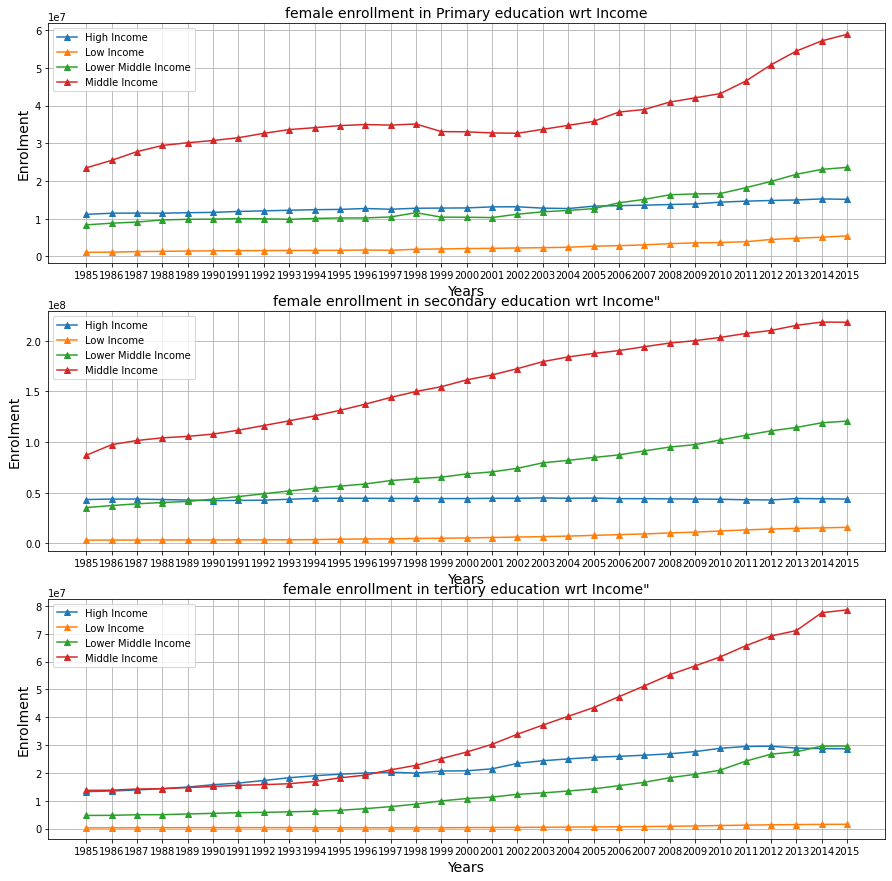

In [ ]:
# Subplotting the chart of all three female enrollment wrt income.


Years= [1985,1990,1995,2000,2005,2010,2015]

plt.subplot(3,1,1)
plt.plot(graph_2a, marker = "^")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in Primary education wrt Income',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)


plt.subplot(3,1,2)
plt.plot(graph_2b, marker = "^")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in secondary education wrt Income"',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(graph_2c,marker = "^")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in tertiory education wrt Income"',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)

plt.show()   



# Above function will create and display the graph after successful execution.  
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# marker:- used to show a trend or mark an important value.  

##***Inferrence***

---



---




1.   Number of female getting enrolled in primary, secondry and tertiary level is showing increasing trend in all the income group over the years,it shows the awareness toward the girl education is increasing.  





Q3. Analyse the trend for teacher to  pupil ration over different income group

In [ ]:
#Extracting Data and creating dataframe for the analysis wih indicator code SE.PRM.TCHR.FE.ZS
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.TCHR.FE.ZS']
graph_4b=no_primary_enrollment.transpose()
graph_4b.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4b.dropna(inplace=True)


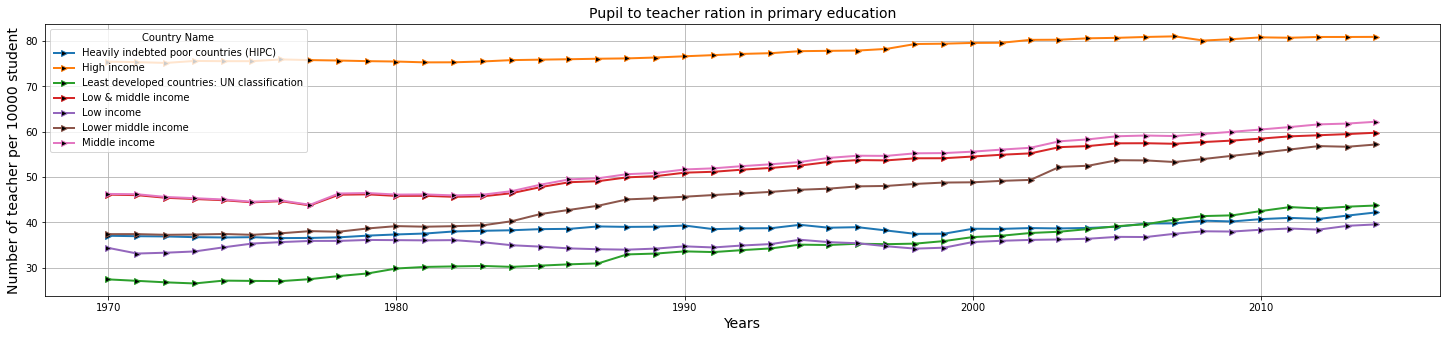

In [ ]:
#Ploting the tredn

plt.rcParams['figure.figsize']=(25,5)
graph_4b.plot(linewidth=2,
    linestyle='-',
    marker='>',markersize=6,markerfacecolor='black',grid=True)
plt.title('Pupil to teacher ration in primary education',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Number of teacher per 10000 student',fontsize=14)
plt.show()

# Above function will create and display the graph after successful execution.  
# kind:- Type of graph.
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# linewidth:- thickness of trend lines.
# linestyle :- the style of the lines.
# marker:- used to show a trend or mark an important value.                

##***Inferrence:-***

1.   The number of teacher are inreasing after 1990 over all the income group. 
2.   With the increase in GDP, per capita income and awareness towards education, the teacher to pupil ration is increasing in lower and middle income as well.



---



---



Q4. Show what percent of GDP, each country spend on Education

In [ ]:
# Extraction of data and creating Dataframe with indicator code SE.XPD.TOTL.GD.ZS
exp1_1=pd.read_csv(path3)
exp1_1.set_index('Indicator Code',inplace=True)
exp2_1=exp1_1.loc[['SE.XPD.TOTL.GD.ZS'],['Country Name','Country Code','1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010']]
exp2_1.set_index('Country Name',inplace=True)
exp3_1=exp2_1.drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
exp3_1.drop('Country Code',axis=1,inplace=True)
exp4_1=exp3_1.transpose()

exp4_1 # Final Data Frame


Country Name,Argentina,Armenia,Austria,Azerbaijan,Benin,Colombia,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,...,Slovak Republic,South Africa,Spain,Sweden,Switzerland,Tajikistan,Thailand,Togo,Tunisia,United Kingdom
1999,4.51408,2.23619,6.13795,4.21217,2.62048,4.42809,4.09449,6.75508,4.71968,3.68879,...,4.11247,5.87260,4.27280,6.92362,4.89592,2.07659,4.83249,4.18744,6.27099,4.06374
2000,4.58360,2.77633,5.60472,3.85399,2.88743,3.50333,3.70380,7.70486,4.89278,3.66536,...,3.87199,5.44197,4.17798,6.81987,4.78606,2.32863,5.25327,4.51075,6.20198,4.10980
2001,4.82829,2.46081,5.58878,3.50342,3.24010,3.70624,3.67073,8.35785,5.03351,3.76072,...,3.94199,5.16125,4.11710,6.68097,4.96211,2.37658,4.81336,4.18628,6.20183,4.17893
2002,4.01195,2.13892,5.54010,3.15449,2.94995,4.27376,4.08827,9.57120,5.48652,3.98989,...,4.25106,5.04762,4.13762,7.00070,5.32322,2.77580,3.86464,4.00874,5.79003,4.71955
2003,3.53420,2.15119,5.38185,3.28615,3.12000,4.33062,3.96629,9.94078,6.65670,4.15177,...,4.21721,4.85395,4.16962,6.85111,5.53856,2.42263,3.72402,4.19424,6.81673,4.88927
2004,3.48735,2.48406,5.31006,3.44766,3.50598,4.07620,4.12571,10.26828,6.08196,4.01744,...,4.10813,5.05277,4.15031,6.71100,5.45846,2.77208,4.03337,3.63333,6.72078,4.80557
2005,3.84376,2.71551,5.27167,2.97462,3.63625,3.99684,4.10655,10.55769,6.19600,3.89627,...,3.76522,5.05164,4.12810,6.55354,5.22361,3.51215,3.94087,3.39375,6.45157,5.01561
2006,4.11043,2.71188,5.26237,2.55551,3.50185,3.89228,4.00060,9.05729,6.22760,4.22046,...,3.71354,5.07026,4.15923,6.40877,4.98269,3.40348,4.05069,3.66957,6.43859,5.04410
2007,4.44269,3.01825,5.18300,2.54928,3.23094,4.05938,4.25834,11.86829,6.25248,3.87684,...,3.52932,4.97252,4.23648,6.20952,4.71263,3.41328,3.60168,3.69752,6.46552,4.96506
2008,4.84291,3.17115,5.29572,2.44093,3.80054,3.91051,4.36058,14.05908,6.72402,3.74839,...,3.52674,4.86486,4.48577,6.38620,4.89597,3.45983,3.50739,3.42958,6.27219,4.95671


In [ ]:
#Heat map 
cm = sns.light_palette("Teal", as_cmap=True)
exp4_1.style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



Country Name,Argentina,Armenia,Austria,Azerbaijan,Benin,Colombia,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,Denmark,Finland,France,"Gambia, The",Hungary,Iceland,"Iran, Islamic Rep.",Ireland,Israel,Italy,Kyrgyz Republic,"Macao SAR, China",Mauritius,Mexico,Moldova,Nepal,Netherlands,Norway,Peru,Poland,Portugal,Qatar,Slovak Republic,South Africa,Spain,Sweden,Switzerland,Tajikistan,Thailand,Togo,Tunisia,United Kingdom
1999,4.51,2.24,6.14,4.21,2.62,4.43,4.09,6.76,4.72,3.69,7.94,5.87,5.64,1.57,4.58,6.47,4.22,4.14,6.42,4.53,4.09,3.69,3.94,3.66,4.66,2.89,4.56,6.94,3.44,4.60,5.03,4.35,4.11,5.87,4.27,6.92,4.90,2.08,4.83,4.19,6.27,4.06
2000,4.58,2.78,5.60,3.85,2.89,3.50,3.70,7.70,4.89,3.67,8.07,5.73,5.50,1.47,4.88,6.50,4.03,4.15,6.11,4.30,3.51,3.68,3.82,4.14,4.49,2.98,4.63,6.46,3.22,4.99,5.18,3.73,3.87,5.44,4.18,6.82,4.79,2.33,5.25,4.51,6.20,4.11
2001,4.83,2.46,5.59,3.50,3.24,3.71,3.67,8.36,5.03,3.76,8.22,5.87,5.43,1.16,4.93,6.79,4.07,4.09,6.38,4.66,3.85,2.73,3.18,4.43,4.85,3.71,4.75,6.85,3.03,5.33,5.33,3.20,3.94,5.16,4.12,6.68,4.96,2.38,4.81,4.19,6.20,4.18
2002,4.01,2.14,5.54,3.15,2.95,4.27,4.09,9.57,5.49,3.99,8.21,6.04,5.42,1.44,5.19,7.42,4.49,4.10,6.46,4.43,4.45,2.86,3.12,4.64,5.50,3.15,4.87,7.44,2.82,5.40,5.24,3.85,4.25,5.05,4.14,7.00,5.32,2.78,3.86,4.01,5.79,4.72
2003,3.53,2.15,5.38,3.29,3.12,4.33,3.97,9.94,6.66,4.15,8.10,6.16,5.71,1.36,5.80,7.33,4.38,4.19,6.36,4.56,4.48,2.80,4.48,5.18,5.42,3.12,5.10,7.42,2.94,5.33,5.28,3.37,4.22,4.85,4.17,6.85,5.54,2.42,3.72,4.19,6.82,4.89
2004,3.49,2.48,5.31,3.45,3.51,4.08,4.13,10.27,6.08,4.02,8.19,6.19,5.64,1.03,5.36,7.22,4.29,4.49,5.95,4.39,4.62,2.25,4.46,4.80,6.77,3.17,5.11,7.31,2.96,5.36,5.05,3.46,4.11,5.05,4.15,6.71,5.46,2.77,4.03,3.63,6.72,4.81
2005,3.84,2.72,5.27,2.97,3.64,4.00,4.11,10.56,6.20,3.90,8.07,6.05,5.51,1.14,5.34,7.42,4.20,4.53,5.75,4.25,4.87,2.29,4.19,4.91,7.16,3.36,5.16,6.87,2.84,5.43,5.06,3.96,3.77,5.05,4.13,6.55,5.22,3.51,3.94,3.39,6.45,5.02
2006,4.11,2.71,5.26,2.56,3.50,3.89,4.00,9.06,6.23,4.22,7.74,5.92,5.45,1.21,5.32,7.35,4.42,4.55,5.75,4.53,5.54,2.21,3.83,4.76,7.50,3.61,5.09,6.37,2.66,5.20,4.92,2.71,3.71,5.07,4.16,6.41,4.98,3.40,4.05,3.67,6.44,5.04
2007,4.44,3.02,5.18,2.55,3.23,4.06,4.26,11.87,6.25,3.88,7.61,5.67,5.43,1.31,5.16,7.08,4.74,4.72,5.48,4.12,6.46,2.06,3.18,4.73,8.29,3.52,4.94,6.53,2.63,4.86,4.94,2.45,3.53,4.97,4.24,6.21,4.71,3.41,3.60,3.70,6.47,4.97
2008,4.84,3.17,5.30,2.44,3.80,3.91,4.36,14.06,6.72,3.75,7.48,5.84,5.43,3.53,5.00,7.26,4.06,5.44,5.52,4.41,5.91,2.20,3.07,4.84,8.24,3.80,5.09,6.28,2.87,5.03,4.70,4.23,3.53,4.86,4.49,6.39,4.90,3.46,3.51,3.43,6.27,4.96


Q5. Show the correlation of GDP, Unemployment and illiterate labour force

In [ ]:
nn=pd.read_csv(path3)# World,China,India,United States,Germany,Euro area
nn.set_index('Indicator Code',inplace=True)
nn2=nn.loc[['SE.ADT.1524.LT.ZS','NY.GDP.PCAP.CD','SL.UEM.TOTL.ZS','SL.TLF.TOTL.IN'],['Country Name','2010']]
World={'GDP percapita':[9.516347e+03,4.560513e+03,1.345770e+03,4.837388e+04,4.178556e+04,3.761772e+04],
       'total unemployment':[6.081802e+00,4.200000e+00,3.600000e+00,4.837388e+04,7.000000e+00,1.013016e+01],
       'total illiterate workforce':[3.181296e+09,7.799515e+08,4.706091e+08,1.570211e+08,4.201639e+07,1.614402e+08]}

# Correlation DF
cor=pd.DataFrame(World,index=['World','China','India','United States','Germany','Euro area'])
print(cor) # this is Df

#Making correlation
final_cor=cor.corr()
print(final_cor) # this is correlated df


               GDP percapita  total unemployment  total illiterate workforce
World               9516.347            6.081802                3.181296e+09
China               4560.513            4.200000                7.799515e+08
India               1345.770            3.600000                4.706091e+08
United States      48373.880        48373.880000                1.570211e+08
Germany            41785.560            7.000000                4.201639e+07
Euro area          37617.720           10.130160                1.614402e+08
                            GDP percapita  total unemployment  \
GDP percapita                    1.000000            0.572886   
total unemployment               0.572886            1.000000   
total illiterate workforce      -0.513668           -0.262447   

                            total illiterate workforce  
GDP percapita                                -0.513668  
total unemployment                           -0.262447  
total illiterate workforce   

Text(0.5, 1.0, 'Correlation of GDP,Illetrate work force and total unemployment')

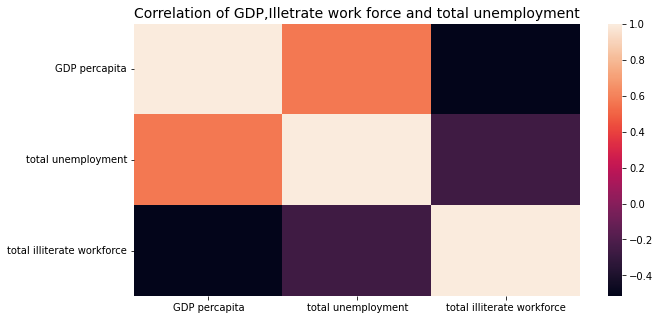

In [ ]:
#making Correleation map
plt.figure(figsize=(10,5))
sns.heatmap(final_cor)
plt.title('Correlation of GDP,Illetrate work force and total unemployment',fontsize=14)


##***Inferrence***

1. As the GDP increases the number of illeterate labourforce decreses, that's why they are negetively correlated.

2. From the corelation we can obseve that as the total unemployment decreases 
  as per capita income increases, so they are negatively corelated.




###***Population growth across different income group with time***

---



---



---



Q1. Show the relation of Income on Population Growth

In [ ]:
# Extracting Data and creating dataframe with indicator code SP.POP.GROW  
population_growth =Income_df[Income_df['Indicator Code']=='SP.POP.GROW']
population_growth.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
graph_1=population_growth.transpose()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



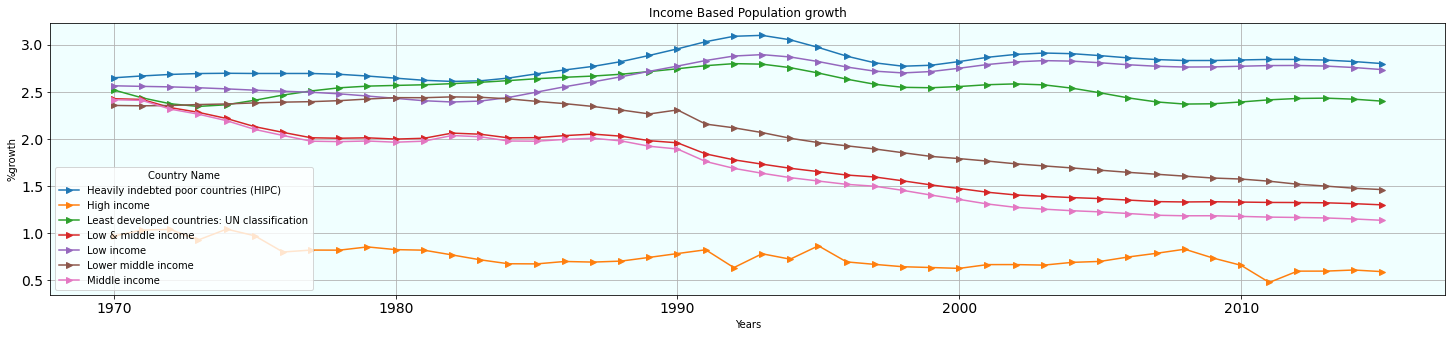

In [ ]:
# Using plot() from pandas module to plot a line graph.
# this plot function is just the extension to the plot() in matplotlib.

plt.rcParams['figure.figsize']=(25,5)
graph_1.plot( kind="line",xlabel = "Years" , ylabel = "%growth",
               title="Income Based Population growth",   
               fontsize = 14,figsize=(25,5),
                 grid=True,linewidth =1.5, 
                marker = ">").patch.set_facecolor('#f0ffff')

# Above function will create and display the graph after successful execution. 
# Also we've called another function i.e., patch.set_facecolor() with the plot object, 
# this helps us to change the background colour of the plot.
# kind:- Type of graph.
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# linewidth:- thickness of trend lines.
# marker:- used to show a trend or mark an important value.                

#Inferrence# 
1. The population growth rate for high income group has been in a narrow range of 0.5% to 1% .

2. Lower income groups saw a increase of 0.5 % from 2.5% to 3% till 1990s after that the trend gets reverted.

3. Middle income group saw an steady decline from 2.5% in 1970 to below 1.5% in the year 2010.

 

###***Case study for big Economies for Expenditure on Education and their learning outcomes based on data by PISA***



















Q1. Analyse the expenditure on education by the government and its outcome for the big economys of the world.

In [ ]:
# Cleaning data for further use using indicator code SE.XPD.TOTL.GD.ZS
clean_data1=new_data[['Country Name','Indicator Code','1990','2000','2010']]
Sorted1_1=clean_data1[clean_data1['Indicator Code']=='SE.XPD.TOTL.GD.ZS'].set_index(['Country Name'])
Sorted2_1=Sorted1_1.copy()
Sorted2_1.drop("Indicator Code",axis=1,inplace=True)

Graphk=Sorted2_1.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Graphk2=Graphk.transpose()


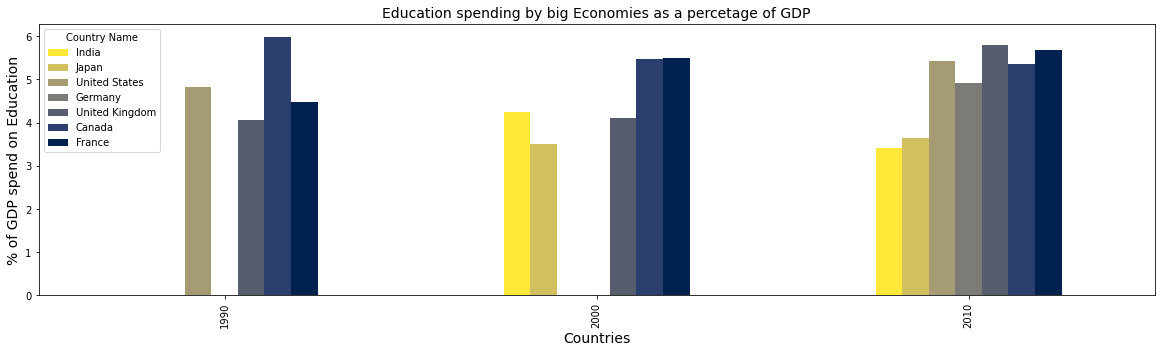

In [ ]:
# Ploting bar chart for education spending by big Economies.
plt.rcParams['figure.figsize']=(20,5)
Graphk2.plot(kind='bar',colormap="cividis_r")
plt.title('Education spending by big Economies as a percetage of GDP',fontsize=14)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('% of GDP spend on Education',fontsize=14)
plt.show()

# Q2. Educated labour force accross the big 7 economy.

In [ ]:
# clean data to find Amount of labour force
clean_data1_1=new_data[['Country Name','Indicator Code','1990','2000','2010']]
Sorted1_2=clean_data1_1[clean_data1_1['Indicator Code']=='SL.TLF.TOTL.IN'].set_index(['Country Name'])
Sorted2=Sorted1_2.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Sorted2.drop(['Indicator Code'],axis=1,inplace=True)
Sorted3=Sorted2.transpose()
print(Sorted3)


Country Name        India       Japan  United States     Germany  \
1990          327611171.0  63873046.0    127940053.0  38880161.0   
2000          405518817.0  67670439.0    146767633.0  40252431.0   
2010          470609097.0  66665009.0    157021140.0  42016390.0   

Country Name  United Kingdom      Canada      France  
1990              29039812.0  14716537.0  26127625.0  
2000              29295735.0  16235329.0  27479571.0  
2010              32010605.0  18913406.0  29861080.0  


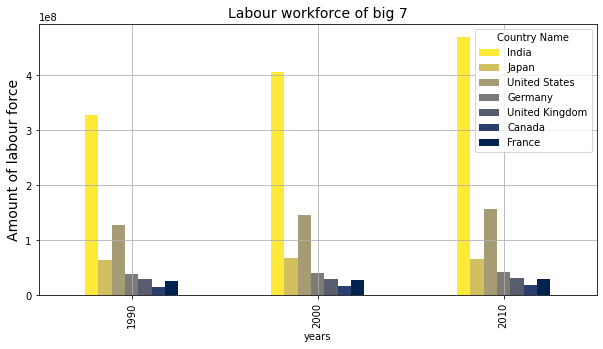

In [ ]:
# Plot bar chart
plt.rcParams['figure.figsize']=(10,5)
Sorted3.plot(kind='bar',colormap= "cividis_r")
plt.grid(True,linewidth=.8)
plt.title('Labour workforce of big 7',fontsize=14)
plt.xlabel('years',fontsize=10)
plt.ylabel('Amount of labour force',fontsize=14)
plt.show()

In [ ]:
# learnning outcome mean peformance on reading scale
Pisa1=new_data[['Country Name','Indicator Code','2015']]
Pisa2=Pisa1[Pisa1['Indicator Code']=='LO.PISA.REA'].set_index(['Country Name'])
Pisa3=Pisa2.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Pisa3.drop(['Indicator Code'],axis=1,inplace=True)
print(Pisa3)


                    2015
Country Name            
India                NaN
Japan           515.9585
United States   496.9351
Germany         509.1041
United Kingdom  497.9719
Canada          526.6678
France          499.3061


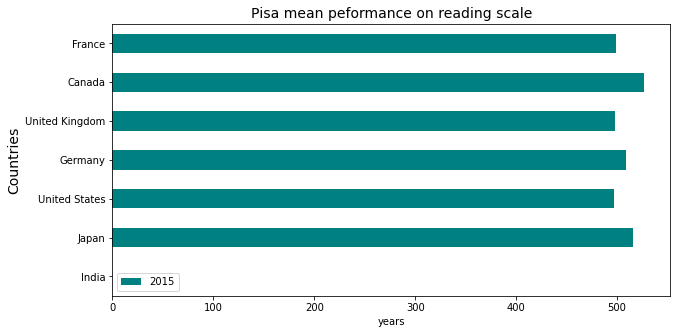

In [ ]:
# plot bar chart
plt.rcParams['figure.figsize']=(10,5)
Pisa3.plot(kind='barh',color= "Teal")
plt.title('Pisa mean peformance on reading scale',fontsize=14)
plt.xlabel('years',fontsize=10)
plt.ylabel('Countries',fontsize=14)
plt.show()

In [ ]:
# learnning outcome mean peformance on mathematic scale
Pisa1M=new_data[['Country Name','Indicator Code','2015']]
Pisa2M=Pisa1M[Pisa1M['Indicator Code']=='LO.PISA.MAT'].set_index(['Country Name'])
Pisa3M=Pisa2M.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Pisa3M.drop(['Indicator Code'],axis=1,inplace=True)
print(Pisa3M)


                    2015
Country Name            
India                NaN
Japan           532.4399
United States   469.6285
Germany         505.9713
United Kingdom  492.4785
Canada          515.6474
France          492.9204


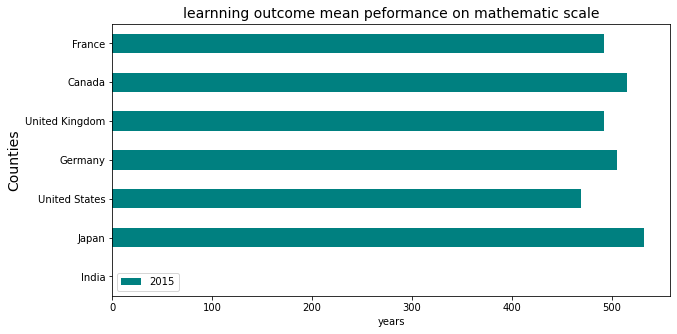

In [ ]:
# plot bar chart
plt.rcParams['figure.figsize']=(10,5)
Pisa3M.plot(kind='barh',color= "Teal")
plt.title('learnning outcome mean peformance on mathematic scale',fontsize=14)
plt.xlabel('years',fontsize=10)
plt.ylabel('Counties',fontsize=14)
plt.show()